In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# System
depth = 1000  # m
temperature = 30  # ºC
S_v = 1990 * 9.81 * depth  # 1990 kg/m^3 for a quartz sandstone with 40% porosity
P_pore = 1000 * 9.81 * depth
sigma_eff = S_v - P_pore
print(f'The effective vertical stress for a depth of {depth}m is {sigma_eff * 1e-6}MPa.')

The effective vertical stress for a depth of 1000m is 9.7119MPa.


In [5]:
# Quartz
K1 = 37 * 1e9  # Pa
G1 = 44 * 1e9  # Pa
rho_1 = 2650  # kg/m^3

# Clay
K2 = 21 * 1e9  # Pa
G2 = 7 * 1e9  # Pa
rho_2 = 2600  # kg/m^3

# Water
K3 = 2.4 * 1e9  # Pa
G3 = 0 * 1e9  # Pa
rho_3 = 1000  # kg/m^3

# Gas
K4 = 0.01 * 1e9  # Pa
G4 = 0 * 1e9  # Pa
rho_4 = 10  # kg/m^3

# Define the range of porosity values to calculate
phi = np.linspace(0, 1, 100)

# Calculate the effective bulk modulus using the Voigt, Reuss, Voigt-Reuss-Hill, and Hashin-Shtrikman models
K_Reuss = 1 / ((1 - phi) / K1 + phi / K2)
K_Voigt = (1 - phi) * K1 + phi * K2
K_Voigt_Reuss_Hill = (K_Voigt + K_Reuss) / 2
K_up_HS = K1 + phi / ((1 / (K2 - K1)) + (1 - phi) / (K1 + 4 * G1 / 3))
K_low_HS = K2 + (1 - phi) / ((1 / (K1 - K2) + phi / K2))

# Calculate the effective shear modulus using the Voigt, Reuss, Voigt-Reuss-Hill, and Hashin-Shtrikman models
G_Reuss = 1 / ((1 - phi) / G1 + phi / G2)
G_Voigt = (1 - phi) * G1 + phi * G2
G_Voigt_Reuss_Hill = (G_Voigt + G_Reuss) / 2
G_up_HS = G1 + phi / ((1 / (G2 - G1)) + 2 * (1 - phi) * (K1 + 2 * G1) / (5 * G1 * (K1 + 4 / 3 * G1)))
G_low_HS = G2 + (1 - phi) / ((1 / (G1 - G2)) + 2 * phi * (K2 + 2 * G2) / (5 * G2 * (K2 + 4 / 3 * G2)))

# print(f"K_Reuss: {K_Reuss}")
# print(f"K_Voigt: {K_Voigt}")
# print(f"K_Voigt_Reuss_Hill: {K_Voigt_Reuss_Hill}")
# print(f"K_up_HS: {K_up_HS}")
# print(f"K_low_HS: {K_low_HS}")

# print(f"G_Reuss: {G_Reuss}")
# print(f"G_Voigt: {G_Voigt}")
# print(f"G_Voigt_Reuss_Hill: {G_Voigt_Reuss_Hill}")
# print(f"G_up_HS: {G_up_HS}")
# print(f"G_low_HS: {G_low_HS}")

In [6]:
# Calculate the density of the solid mixture
rho_mix = (1 - phi) * rho_1 + phi * rho_2

# Calculate the bulk modulus using Wood's formular
K_Wood = 1 / ((1 - phi) / K3 + phi / K4)

In [7]:
# Calculate the porosity for depth of interest
# for sandstone b=2.7E-9
b = 2.7e-4
phi_initial = 0.4
phi_depth = phi_initial * np.exp(-b * depth)
print(
    f'The porosity for the sandstone with an initial porosity of {phi_initial} at a depth of {depth}m is: {phi_depth} ')

The porosity for the sandstone with an initial porosity of 0.4 at a depth of 1000m is: 0.3053517977347413 


In [8]:
# Calculate the coordination number for sand
# well-sorted
eta_well_sorted = 9.54 - 0.239 * phi_depth + 27.19 * phi_depth ** 2
print(f'The coordination number for a well-sorted sandstone at a depth of {depth}m is: {eta_well_sorted} ')
# poorly-sorted
eta_poorly_sorted = 17.34 - 34 * phi_depth + 14 * phi_depth ** 2
print(f'The coordination number for a poorly-sorted sandstone at a depth of {depth}m is: {eta_poorly_sorted} ')
# angular grains
eta_angular_grains = 20 - 34 * phi_depth + 14 * phi_depth ** 2
print(f'The coordination number for sandstone with angular grains at a depth of {depth}m is: {eta_angular_grains} ')
# eta_initial = 12
# eta = eta_initial+9.7*(phi_initial-phi_depth)**0.48
# print(eta)

The coordination number for a well-sorted sandstone at a depth of 1000m is: 12.0022089174692 
The coordination number for a poorly-sorted sandstone at a depth of 1000m is: 8.263394962336532 
The coordination number for sandstone with angular grains at a depth of 1000m is: 10.923394962336532 


In [9]:
# Calculate dry bulk and shear modulus after Hertz-Mindlin model
set_porosity = 0  # float from 0 to 99 corresponding 1 - 100%
poisson_ratio = (3 * K1 - 2 * G1) / (2 * (3 * K1 + G1))
print(poisson_ratio)

K_HZ = ((1 / 18) * ((eta_well_sorted * G1 * (1 - phi_depth)) / (np.pi * (1 - poisson_ratio))) ** 2 * sigma_eff) ** (
            1 / 3)
print(K_HZ * 1e-9)
G_HZ = (5 - (4 * poisson_ratio)) / (5 * (2 - poisson_ratio)) * (3 / 2 * (
            (eta_well_sorted * G1 * (1 - phi_depth)) / (np.pi * (1 - poisson_ratio))) ** 2 * sigma_eff) ** (
                   1 / 3)
print(G_HZ * 1e-9)

phi_HM_dry = phi/phi_depth
K_low_HS_HM_dry = K_HZ + (1 - phi_HM_dry) / ((1 / (K1 - K_HZ) + phi_HM_dry / K_HZ))
G_low_HS_HM_dry = G_HZ + (1 - phi_HM_dry) / ((1 / (G1 - G_HZ)) + 2 * phi_HM_dry * (K2 + 2 * G_HZ) / (5 * G2 * (K2 + 4 / 3 * G_HZ)))

# Calculate the density after Hertz-Mindlin moduli
# rho_mix = (1 - phi) * rho_1 + phi * rho_2
density_HM = (1 - phi_depth) * rho_1
rho_mix_HM_point = (1 - phi_depth) * rho_1 + phi_depth * density_HM
rho_mix_HM = (1 - phi) * rho_1 + phi * density_HM

# Calculate the density after Hertz-Mindlin with water
rho_mix_HM_point_water = (1 - phi_depth) * rho_mix_HM_point + phi_depth * rho_3
rho_mix_HM_water = (1 - phi) * rho_1 + phi * rho_mix_HM_point_water


rho_mix_HM_point_gas = (1 - phi_depth) * rho_mix_HM_point + phi_depth * rho_4
rho_mix_HM_gas = (1 - phi) * rho_1 + phi * rho_mix_HM_point_gas

0.07419354838709677
2.0474644270913953
3.000204155476637


In [10]:
# Calculate the wet moduli according to Gassmann
K_dry = K_HZ
K_mineral = K1
K_fluid = K3
K_sat_point_wet_water = K_dry + (1 - (K_dry / K_mineral)) ** 2 / (phi_depth / K_fluid + (1 - phi_depth) / K_mineral - K_dry / K_mineral ** 2)
print(f'Bulk modulus after to Gassmann {K_sat_point_wet_water * 1e-9} in GPa')
K_low_HS_HM_wet_water = K_sat_point_wet_water + (1 - phi_HM_dry) / ((1 / (K1 - K_sat_point_wet_water) + phi_HM_dry / K_sat_point_wet_water))


# 10 % of gas: K_Wood[9]
K_fluid = K_Wood[9]
K_sat_point_wet_gas = K_dry + (1 - (K_dry / K_mineral)) ** 2 / (phi_depth / K_fluid + (1 - phi_depth) / K_mineral - K_dry / K_mineral ** 2)
K_low_HS_HM_wet_gas = K_sat_point_wet_gas + (1 - phi_HM_dry) / ((1 / (K1 - K_sat_point_wet_gas) + phi_HM_dry / K_sat_point_wet_gas))

Bulk modulus after to Gassmann 8.222795278031509 in GPa


(0.0, 1.0)

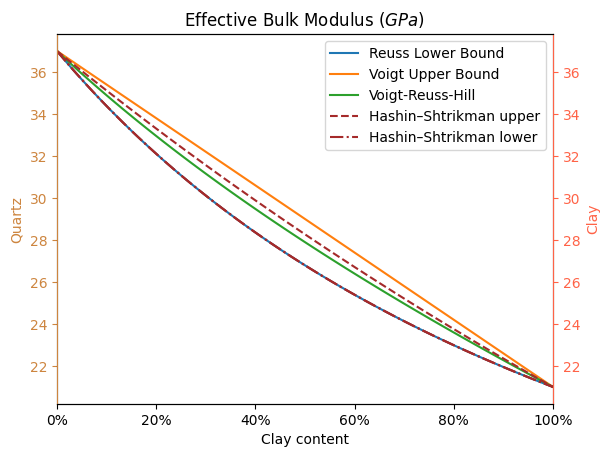

In [11]:
# ------------------ BULK MODULUS ------------------#
# Create the first figure showing the effective bulk modulus vs. porosity
# fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Effective Bulk Modulus ($GPa$)")
ax1.plot(phi, K_Reuss * 1e-9, label="Reuss Lower Bound")
# ax1.plot(phi, K_Reuss, label="Lower Bound")
ax1.plot(phi, K_Voigt * 1e-9, label="Voigt Upper Bound")
# ax1.plot(phi, K_Voigt, label="Upper Bound")
ax1.plot(phi, K_Voigt_Reuss_Hill * 1e-9, label="Voigt-Reuss-Hill")
ax1.plot(phi, K_up_HS * 1e-9, label="Hashin–Shtrikman upper", color="brown", linestyle="dashed")
ax1.plot(phi, K_low_HS * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")

ax2 = ax1.twinx()
ax2.plot(phi, K_low_HS * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.set_ylabel("Clay", color=color2)
ax1.legend()
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Clay content")
ax1.set_ylabel("Quartz", color=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.spines['right'].set_color(color2)

# min_range = int(min([K1,K2]))
# max_range =int(max([K1,K2]))
# plt.yticks(range(0,100, 2))
# plt.yticks([])
# plt.ylim([min_range-min_range*0.1, max_range+max_range*0.1])
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, 1])
# fig.savefig('Bulk_modulus.png', format='png', dpi=300)

(0.0, 1.0)

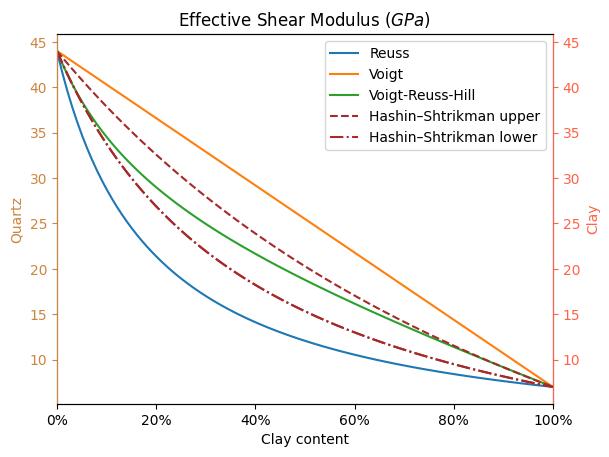

In [12]:
# ------------------ SHEAR MODULUS ------------------#
# Create the second figure showing the effective shear modulus vs. porosity
fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Effective Shear Modulus ($GPa$)")
ax1.plot(phi, G_Reuss * 1e-9, label="Reuss")
ax1.plot(phi, G_Voigt * 1e-9, label="Voigt")
ax1.plot(phi, G_Voigt_Reuss_Hill * 1e-9, label="Voigt-Reuss-Hill")
ax1.plot(phi, G_up_HS * 1e-9, label="Hashin–Shtrikman upper", color="brown", linestyle="dashed")
ax1.plot(phi, G_low_HS * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")

ax2 = ax1.twinx()
ax2.plot(phi, G_low_HS * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.set_ylabel("Clay", color=color2)
ax1.legend()
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Clay content")
ax1.set_ylabel("Quartz", color=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.spines['right'].set_color(color2)

ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, 1])
# fig.savefig('Shear_modulus.png', format='png', dpi=300)

(0.0, 1.0)

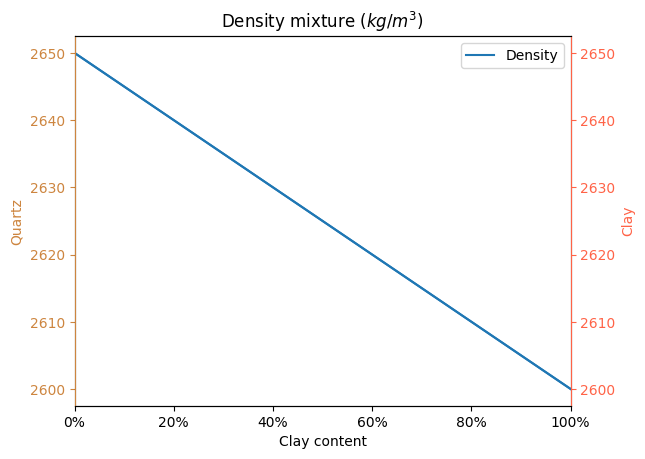

In [13]:
# ------------------ DENSITY ------------------#
fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Density mixture ($kg/m^3$)")
ax1.plot(phi, rho_mix, label="Density")
ax2 = ax1.twinx()
ax2.plot(phi, rho_mix, label="Density")

ax1.legend()
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Clay content")
ax1.set_ylabel("Quartz", color=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.spines['right'].set_color(color2)
ax2.set_ylabel("Clay", color=color2)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, 1])
# fig.savefig('Density_mix.png', format='png', dpi=300)

(0.0, 1.0)

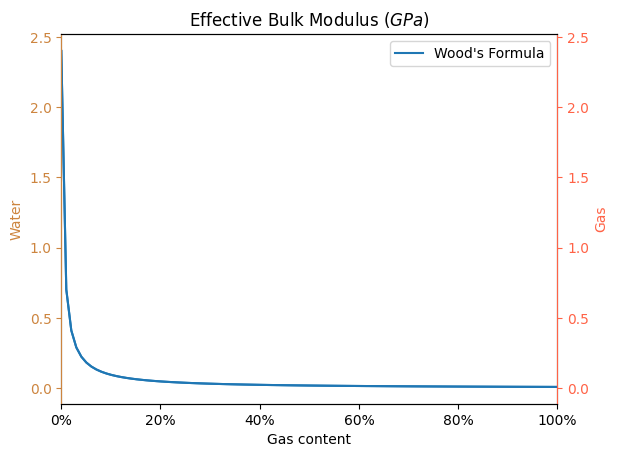

In [14]:
# ------------------ BULK MODULUS (Wood's formular) ------------------#
fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Effective Bulk Modulus ($GPa$)")
ax1.plot(phi, K_Wood * 1e-9, label="Wood's Formula")

ax2 = ax1.twinx()
ax2.plot(phi, K_Wood * 1e-9, label="Wood's Formula")
ax2.set_ylabel("Gas", color=color2)
ax1.legend()
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Gas content")
ax1.set_ylabel("Water", color=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.spines['right'].set_color(color2)

ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, 1])
# fig.savefig('Bulk_modulus_Woods.png', format='png', dpi=300)

(0.0, 0.3083517977347413)

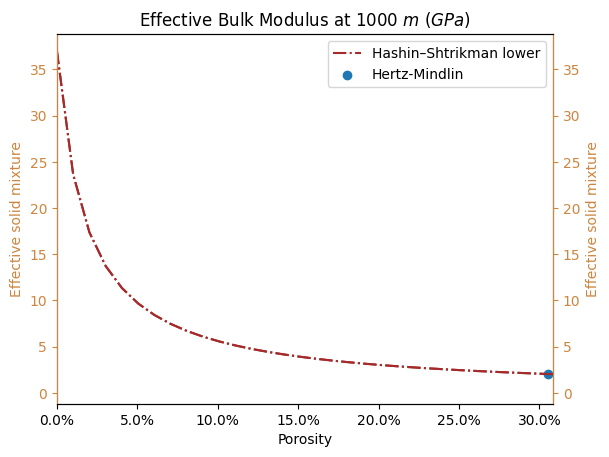

In [15]:
# ------------------ BULK MODULUS (Hertz-Mindlin) ------------------#
fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Effective Bulk Modulus at 1000 $m$ ($GPa$)")
ax1.plot(phi, K_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")


ax2 = ax1.twinx()
ax2.plot(phi, K_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.scatter(phi_depth, K_HZ * 1e-9, label='Hertz-Mindlin')
# ax2.scatter(phi_depth, K_HZ * 1e-9)
# ax1.plot(phi, K_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.set_ylabel("Effective solid mixture", color=color1)
ax2.legend()
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Porosity")
ax1.set_ylabel("Effective solid mixture", color=color1)
ax2.tick_params(axis='y', colors=color1)
ax2.spines['right'].set_color(color1)

ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, phi_depth+0.003])
# fig.savefig('Bulk_modulus_Hertz-Mindlin.png', format='png', dpi=300)

(0.0, 0.3083517977347413)

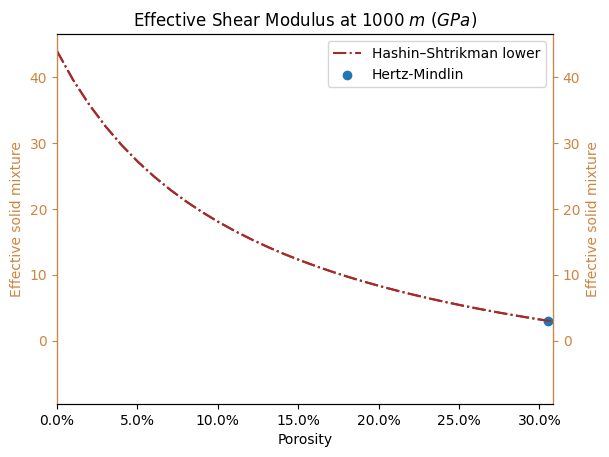

In [16]:
# ------------------ SHEAR MODULUS (Hertz-Mindlin) ------------------#
fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Effective Shear Modulus at 1000 $m$ ($GPa$)")
ax1.plot(phi, G_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")

ax2 = ax1.twinx()
ax2.plot(phi, G_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.scatter(phi_depth, G_HZ * 1e-9, label='Hertz-Mindlin')
# ax2.scatter(phi_depth, K_HZ * 1e-9)
# ax1.plot(phi, K_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.set_ylabel("Effective solid mixture", color=color1)
ax2.legend()
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Porosity")
ax1.set_ylabel("Effective solid mixture", color=color1)
ax2.tick_params(axis='y', colors=color1)
ax2.spines['right'].set_color(color1)

ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, phi_depth+0.003])
# fig.savefig('Shear_modulus_Hertz-Mindlin.png', format='png', dpi=300)

(2300.0, 2700.0)

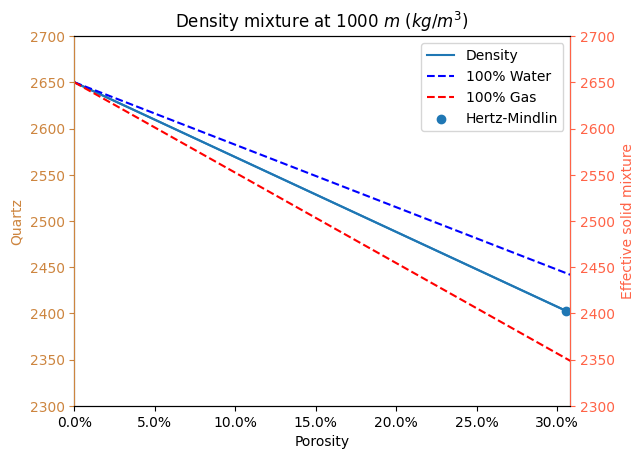

In [17]:
# ------------------ DENSITY for Hertz-Mindlin ------------------#
fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Density mixture at 1000 $m$ ($kg/m^3$)")
ax1.plot(phi, rho_mix_HM, label="Density")

ax2 = ax1.twinx()
ax2.plot(phi, rho_mix_HM, label="Density")
ax2.plot(phi, rho_mix_HM_water, label="100% Water", color="blue", linestyle="dashed")
ax2.plot(phi, rho_mix_HM_gas, label="100% Gas", color="red", linestyle="dashed")
ax2.scatter(phi_depth, rho_mix_HM_point, label='Hertz-Mindlin')

ax2.legend()
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Porosity")
ax1.set_ylabel("Quartz", color=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.spines['right'].set_color(color2)
ax2.set_ylabel("Effective solid mixture", color=color2)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, phi_depth+0.003])
ax1.set_ylim([2300, 2700])
ax2.set_ylim([2300, 2700])
# fig.savefig('Density_mix_HM_fluid_water.png', format='png', dpi=300)

(0.0, 0.3083517977347413)

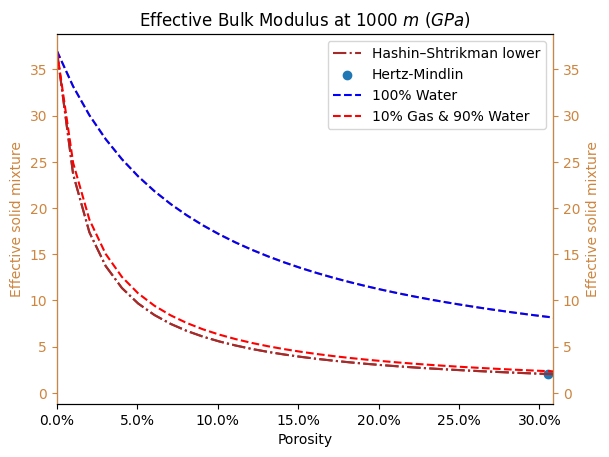

In [18]:
# ------------------ BULK MODULUS after Gassmann (Hertz-Mindlin) ------------------#
fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Effective Bulk Modulus at 1000 $m$ ($GPa$)")
ax1.plot(phi, K_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax1.plot(phi, K_low_HS_HM_wet_water * 1e-9, label="Hashin–Shtrikman lower", color="peru", linestyle="dashed")


ax2 = ax1.twinx()
ax2.plot(phi, K_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.scatter(phi_depth, K_HZ * 1e-9, label='Hertz-Mindlin')
ax2.plot(phi, K_low_HS_HM_wet_water * 1e-9, label="100% Water", color="blue", linestyle="dashed")
ax2.plot(phi, K_low_HS_HM_wet_gas * 1e-9, label="10% Gas & 90% Water", color="red", linestyle="dashed")
# ax2.scatter(phi_depth, K_sat_point_wet_water * 1e-9, label='Gassmann')

# ax2.scatter(phi_depth, K_HZ * 1e-9)
# ax1.plot(phi, K_low_HS_HM_dry * 1e-9, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.set_ylabel("Effective solid mixture", color=color1)
ax2.legend()
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Porosity")
ax1.set_ylabel("Effective solid mixture", color=color1)
ax2.tick_params(axis='y', colors=color1)
ax2.spines['right'].set_color(color1)

ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, phi_depth+0.003])
# fig.savefig('Bulk_modulus_Gassmann_water.png', format='png', dpi=300)

# plt.show()
